# Digits classifier

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# Explore

In [3]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [23]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)
print(digits.target_names)

(1797L, 64L)
(1797L,)
[0 1 2 3 4 5 6 7 8 9]


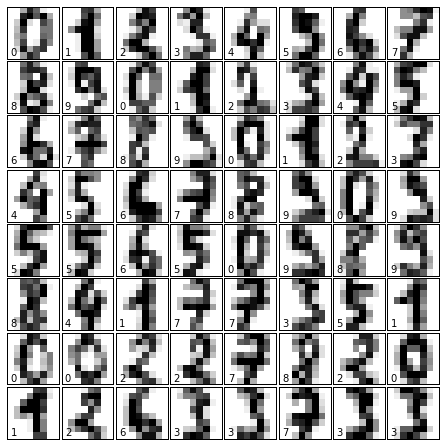

In [5]:
# show some digits
# code snippet from https://github.com/jakevdp/sklearn_pydata2015/

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [6]:
# dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797L, 64L)
(1797L, 2L)


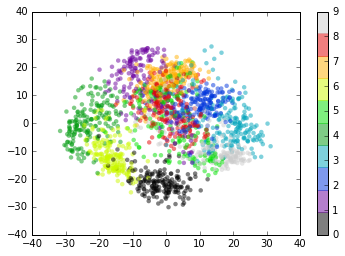

In [7]:
#code snippets from https://github.com/jakevdp/sklearn_pydata2015/
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

# Transform

In [8]:
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler

xsc = MinMaxScaler(feature_range=(-1, 1), copy=True)
xsc.fit(X)
ylb = LabelBinarizer()
ylb.fit(y)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

# Split dataset

In [9]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xsc.transform(X), y, random_state=0)

# Extend dataset

In [10]:
# delete this entire cell if you want just the original scikit digits data
from scipy.ndimage import convolve

# code snippet from http://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html
def nudge_dataset(X, Y):
    
    # This produces a dataset 5 times bigger than the original one,
    # by moving the 8x8 images in X around by 1px to left, right, down, up
    
    print('addind more images by moving the original images up, left, right, down by 1 pixel')
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant',
                                  weights=w).ravel()
    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

print('before', X_train.shape, y_train.shape)
X_train, y_train = nudge_dataset(X_train, y_train)
print('after', X_train.shape, y_train.shape)

('before', (1347L, 64L), (1347L,))
addind more images by moving the original images up, left, right, down by 1 pixel
('after', (6735L, 64L), (6735L,))


In [11]:
# shuffle the X and y arrays in unison
a, b = X_train, y_train
c = np.c_[a.reshape(len(a), -1), b.reshape(len(b), -1)]
np.random.shuffle(c)
a2 = c[:, :a.size//len(a)].reshape(a.shape)
b2 = c[:, a.size//len(a):].reshape(b.shape)

X_train, y_train = a2, b2 # clarity

In [12]:
# binarize the targets
Y_train = ylb.transform(y_train)

# Train

In [13]:
from ann import ANN

nn = ANN([64, 100, 10], 'logistic')

In [14]:
# train
nn.train(X_train, Y_train, 10)

(0, 2267.8949616634181)
(1, 1398.4384179790009)
(2, 1177.0369139626623)
(3, 1027.4984537324858)
(4, 882.9086636927085)
(5, 746.85727118502155)
(6, 633.79953435603215)
(7, 542.55162399004166)
(8, 473.11338391121654)
(9, 418.89897076220376)


In [15]:
# predict
preds = np.array([nn.predict(record) for record in X_test])
y_pred = ylb.inverse_transform(preds)

# Evaluate

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_pred, y_test))

0.966666666667


In [17]:
print(confusion_matrix(y_pred, y_test))

[[37  0  0  0  0  1  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  2  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  1  0 46  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  1  1  0  0  0 48  1  3]
 [ 0  0  1  1  0  0  0  0 45  0]
 [ 0  0  0  0  0  1  0  0  0 43]]


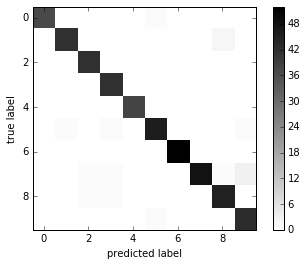

In [18]:
# visualize the confusion matrix
#code snippets from https://github.com/jakevdp/sklearn_pydata2015/
plt.imshow(confusion_matrix(y_pred, y_test),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

In [19]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99        37
          1       0.95      0.98      0.97        43
          2       1.00      0.95      0.98        44
          3       1.00      0.93      0.97        45
          4       1.00      1.00      1.00        38
          5       0.94      0.96      0.95        48
          6       1.00      1.00      1.00        52
          7       0.89      1.00      0.94        48
          8       0.96      0.94      0.95        48
          9       0.98      0.91      0.95        47

avg / total       0.97      0.97      0.97       450



In [20]:
def print_digits(X, y, y_pred):
    # set up the figure
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    
    n = np.min([64, len(X)])
    for i in range(n):
        img = X[i]
        img = np.array(img, np.float)
        img = img.reshape((8,8))

        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(img, cmap=plt.cm.binary, interpolation='nearest')

        # label the image with the target value
        if y_pred[i] == y[i]:
            ax.text(0, 7, str(y_pred[i]), color='g')
        else:
            ax.text(0, 7, str(y_pred[i]), color='r')

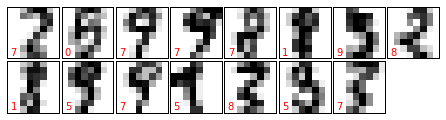

In [21]:
# see bad predictions
failed = y_pred != y_test
X2_test = X_test[failed] 
y2_pred = y_pred[failed] 
y2_test = y_test[failed]
print_digits(X2_test, y2_test, y2_pred)

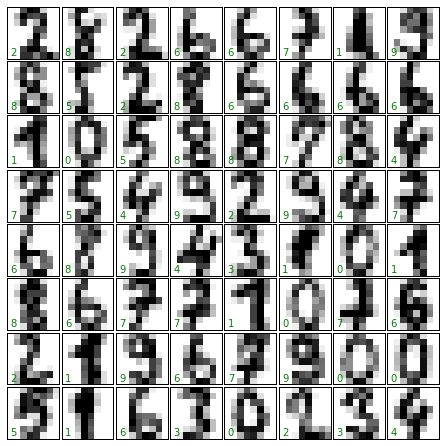

In [22]:
# see some predictions
print_digits(X_test, y_test, y_pred)

# Congratulations!